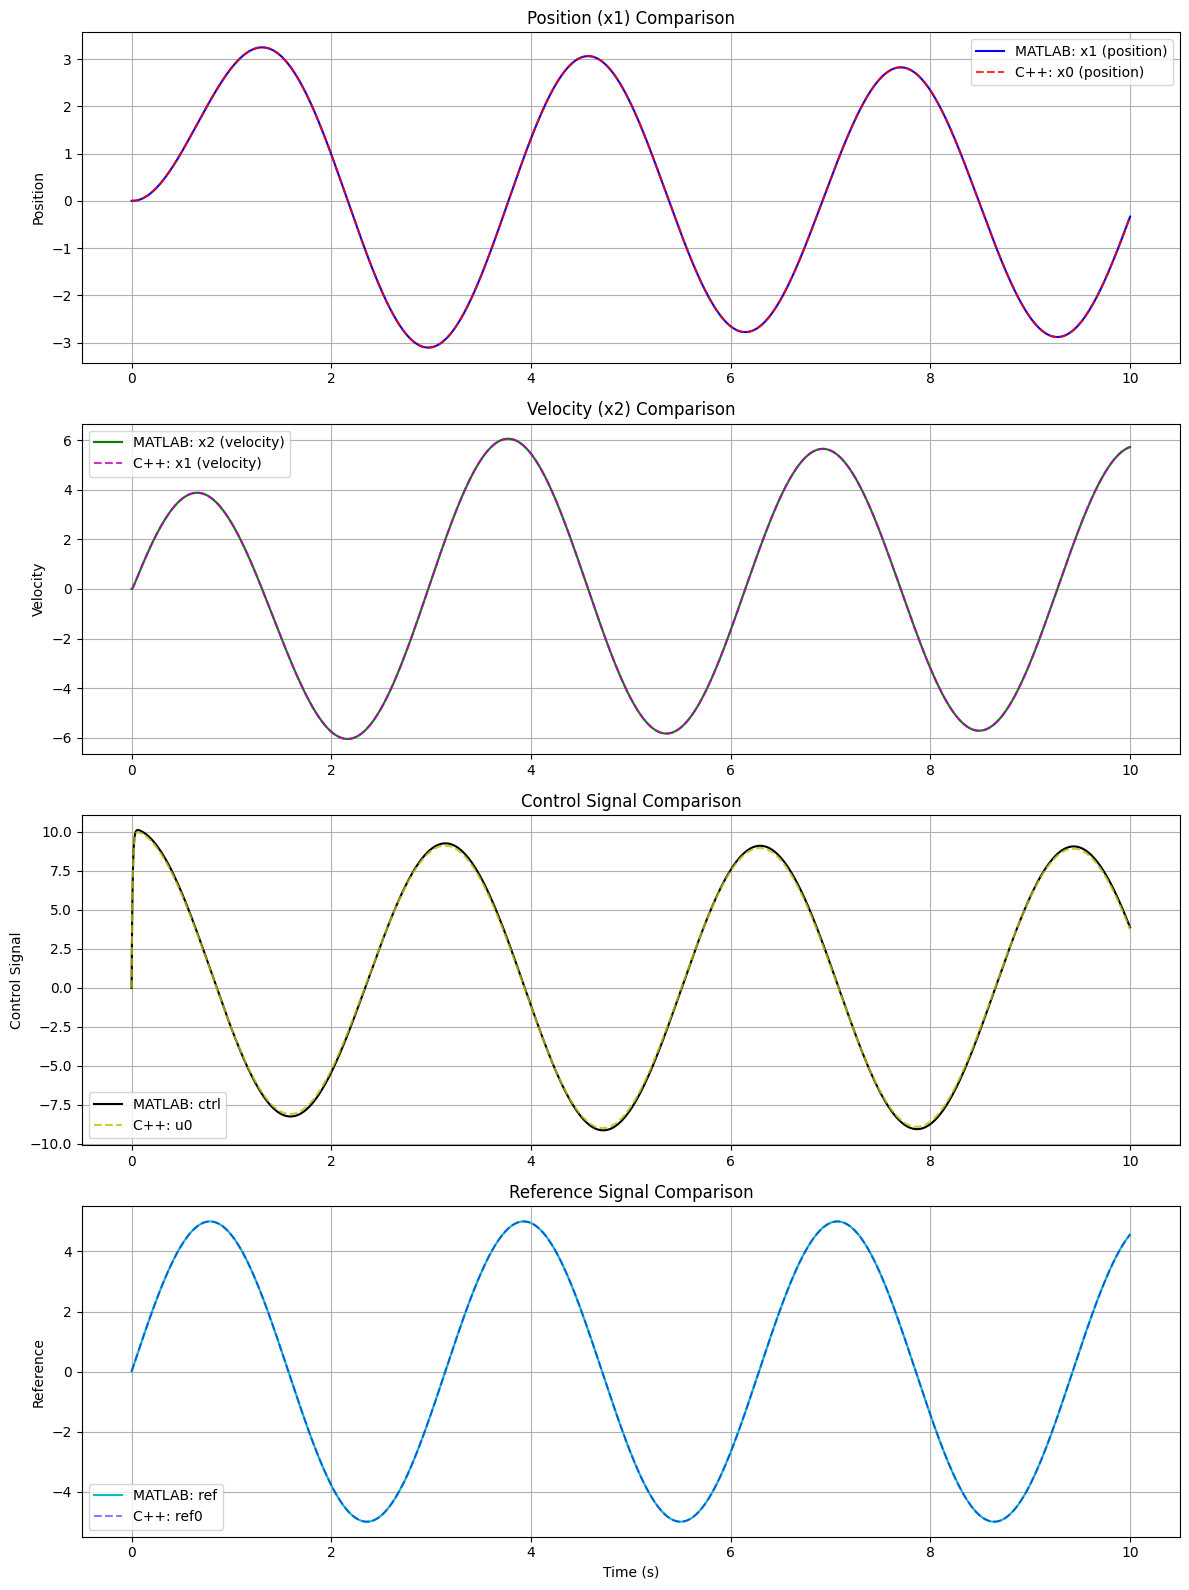

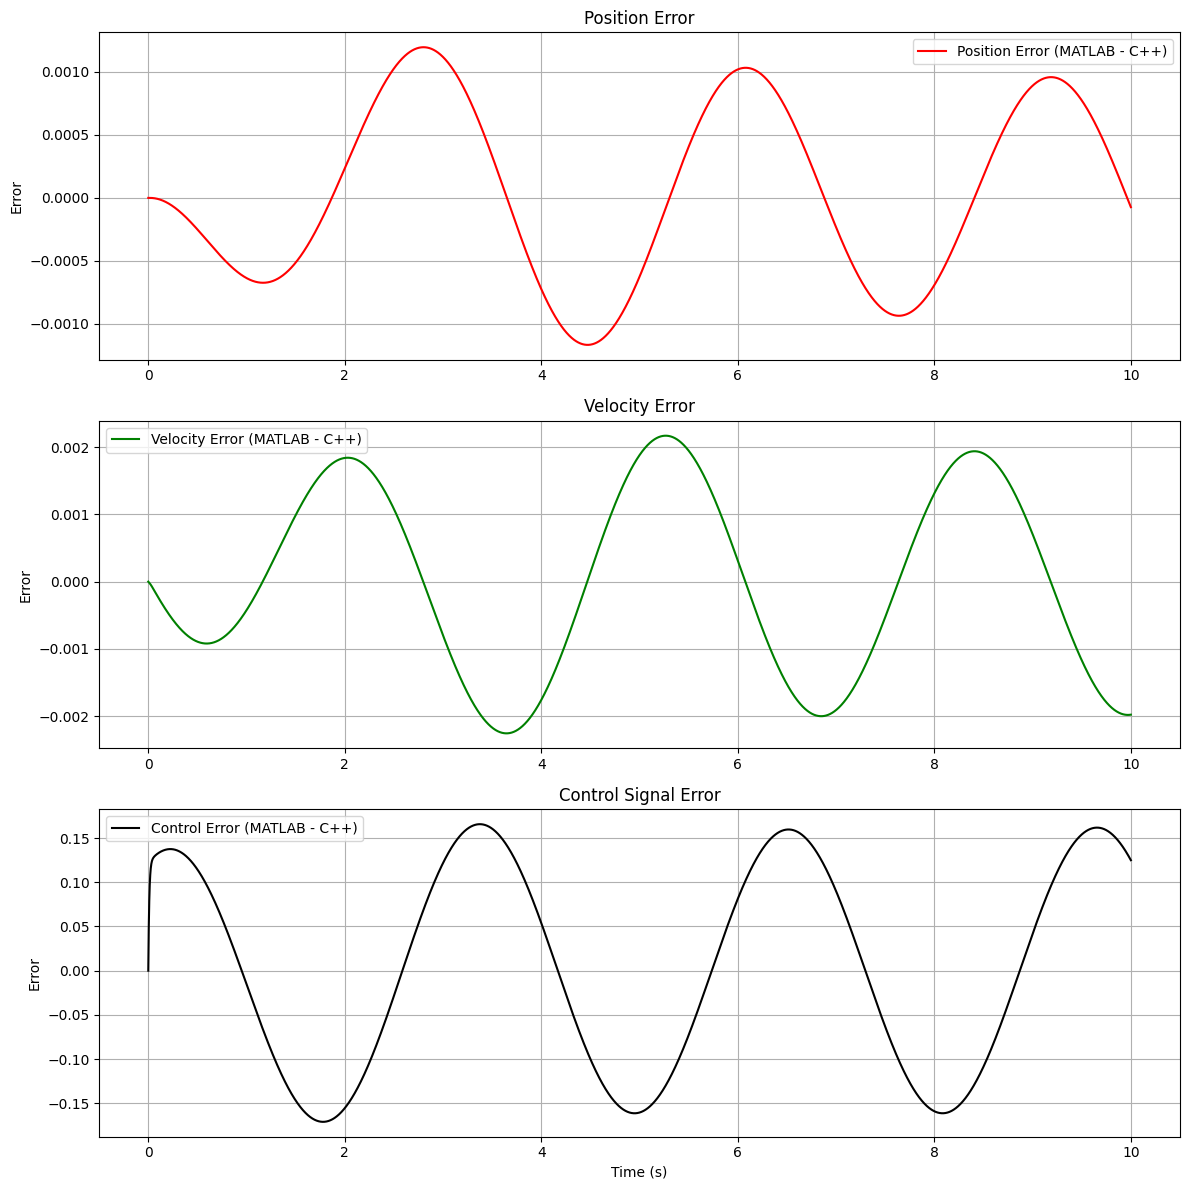

MSE (Position x1): 0.000000
MSE (Velocity x2): 0.000002
MSE (Control ctrl/u0): 0.013493


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy.interpolate import interp1d

# Read MATLAB data (no headers)
df_matlab = pd.read_csv('../data/matlab/MassSpringDamper.csv', header=None, 
                        names=['time', 'x1', 'x2', 'ctrl', 'ref'])

# Read C++ data (has headers)
df_cpp = pd.read_csv('../data/cpp/MassSpringDamper.csv', header=0)

# # Interpolate C++ data to match MATLAB's time points (since ODE45 uses variable steps)
# f_interp_x1 = interp1d(df_cpp['time'], df_cpp['x0'], kind='linear', fill_value="extrapolate")
# f_interp_x2 = interp1d(df_cpp['time'], df_cpp['x1'], kind='linear', fill_value="extrapolate")
# f_interp_ctrl = interp1d(df_cpp['time'], df_cpp['u0'], kind='linear', fill_value="extrapolate")
# f_interp_ref = interp1d(df_cpp['time'], df_cpp['ref0'], kind='linear', fill_value="extrapolate")
# 
# # Get interpolated C++ values at MATLAB time points
# cpp_x1_interp = f_interp_x1(df_matlab['time'])
# cpp_x2_interp = f_interp_x2(df_matlab['time'])
# cpp_ctrl_interp = f_interp_ctrl(df_matlab['time'])
# cpp_ref_interp = f_interp_ref(df_matlab['time'])
# 

cpp_x1_interp = df_cpp["x0"]
cpp_x2_interp = df_cpp["x1"]
cpp_ctrl_interp = df_cpp["u_cmd0"]
cpp_ref_interp = df_cpp["ref0"]

# Create plots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Plot Position (x1)
axes[0].plot(df_matlab['time'], df_matlab['x1'], 'b-', label='MATLAB: x1 (position)')
axes[0].plot(df_matlab['time'], cpp_x1_interp, 'r--', label='C++: x0 (position)', alpha=0.8)
axes[0].set_ylabel('Position')
axes[0].legend()
axes[0].grid(True)
axes[0].set_title('Position (x1) Comparison')

# Plot Velocity (x2)
axes[1].plot(df_matlab['time'], df_matlab['x2'], 'g-', label='MATLAB: x2 (velocity)')
axes[1].plot(df_matlab['time'], cpp_x2_interp, 'm--', label='C++: x1 (velocity)', alpha=0.8)
axes[1].set_ylabel('Velocity')
axes[1].legend()
axes[1].grid(True)
axes[1].set_title('Velocity (x2) Comparison')

# Plot Control Signal (ctrl/u)
axes[2].plot(df_matlab['time'], df_matlab['ctrl'], 'k-', label='MATLAB: ctrl')
axes[2].plot(df_matlab['time'], cpp_ctrl_interp, 'y--', label='C++: u0', alpha=0.8)
axes[2].set_ylabel('Control Signal')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('Control Signal Comparison')

# Plot Reference Signal
axes[3].plot(df_matlab['time'], df_matlab['ref'], 'c-', label='MATLAB: ref')
axes[3].plot(df_matlab['time'], cpp_ref_interp, 'b--', label='C++: ref0', alpha=0.5)
axes[3].set_xlabel('Time (s)')
axes[3].set_ylabel('Reference')
axes[3].legend()
axes[3].grid(True)
axes[3].set_title('Reference Signal Comparison')

plt.tight_layout()
plt.show()

# Plot Absolute Errors
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Position Error
error_x1 = df_matlab['x1'] - cpp_x1_interp
axes[0].plot(df_matlab['time'], error_x1, 'r-', label='Position Error (MATLAB - C++)')
axes[0].set_ylabel('Error')
axes[0].legend()
axes[0].grid(True)
axes[0].set_title('Position Error')

# Velocity Error
error_x2 = df_matlab['x2'] - cpp_x2_interp
axes[1].plot(df_matlab['time'], error_x2, 'g-', label='Velocity Error (MATLAB - C++)')
axes[1].set_ylabel('Error')
axes[1].legend()
axes[1].grid(True)
axes[1].set_title('Velocity Error')

# Control Error
error_ctrl = df_matlab['ctrl'] - cpp_ctrl_interp
axes[2].plot(df_matlab['time'], error_ctrl, 'k-', label='Control Error (MATLAB - C++)')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Error')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('Control Signal Error')

plt.tight_layout()
plt.show()


# Calculate MSE for relevant signals
mse_x1 = np.mean((df_matlab['x1'] - cpp_x1_interp)**2)
mse_x2 = np.mean((df_matlab['x2'] - cpp_x2_interp)**2)
mse_ctrl = np.mean((df_matlab['ctrl'] - cpp_ctrl_interp)**2)

print(f"MSE (Position x1): {mse_x1:.6f}")
print(f"MSE (Velocity x2): {mse_x2:.6f}")
print(f"MSE (Control ctrl/u0): {mse_ctrl:.6f}")